In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read calendar, listings csv
calendar_df = pd.read_csv('calendar.csv')
listing_df = pd.read_csv('listings.csv')


In [84]:
# Question 1: Most expensive days for booking Airbnb in Seattle
# We need to convert price to float
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [85]:
# Question 1: Most expensive days for booking Airbnb in Seattle
# We only need data with price
available_calendar_df = calendar_df[calendar_df['available']=='t']
available_calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0


In [86]:
# Question 1: Most expensive days for booking Airbnb in Seattle
# We do not need the available and listing_id columns for our analysis
available_calendar_df = available_calendar_df.drop('available', axis=1)
available_calendar_df = available_calendar_df.drop('listing_id', axis=1)
available_calendar_df

,date,price
0,2016-01-04,85.0
1,2016-01-05,85.0
9,2016-01-13,85.0
10,2016-01-14,85.0
14,2016-01-18,85.0
...,...,...
1393207,2016-01-06,87.0
1393208,2016-01-07,87.0
1393211,2016-01-10,87.0
1393212,2016-01-11,87.0


In [87]:
# Question 1: Most expensive days for booking Airbnb in Seattle
# We group by date and calculate the mean value
avg_price_day_df = available_calendar_df.groupby(['date']).mean().sort_values(by='price', ascending=False)
avg_price_day_df.rename(columns={'price':'mean price ($)'},inplace=True)
avg_price_day_df

,mean price ($)
date,
2016-07-01,157.480000
2016-07-02,157.080967
2016-07-09,156.448161
2016-07-15,156.365385
2016-07-08,156.260469
...,...
2016-01-13,118.680019
2016-01-25,118.232766
2016-01-27,118.148863


Text(0.5, 1.0, 'Days with the highest mean price ($)')

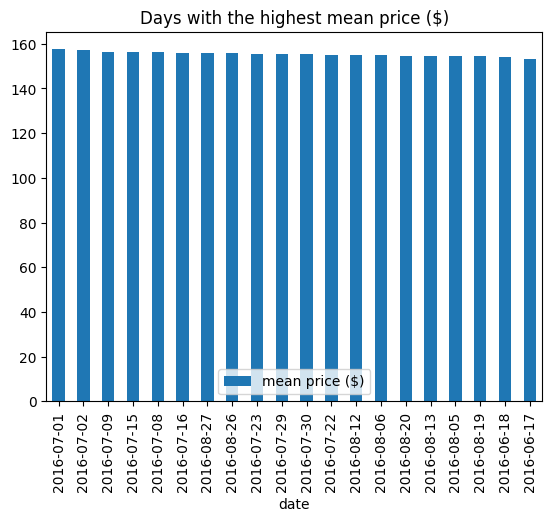

In [88]:
# Question 1: Most expensive days for booking Airbnb in Seattle
# We represent the 20 days with highest mean price
avg_price_day_df[:20].plot(kind='bar');
plt.title('Days with the highest mean price ($)')

In [89]:
# Question 2: Average monthly Airbnb price in Seattle
# We calculate the mean price per month
available_calendar_df['date'] = pd.to_datetime(available_calendar_df['date'])
avg_price_month_df = available_calendar_df.groupby(available_calendar_df.date.dt.month).mean()
avg_price_month_df


/tmp/ipykernel_693/1992019882.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_price_month_df = available_calendar_df.groupby(available_calendar_df.date.dt.month).mean()


,price
date,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137
7,152.094150
8,150.656594
9,143.255949


Text(0.5, 1.0, 'Average monthly Airbnb price in Seattle ($)')

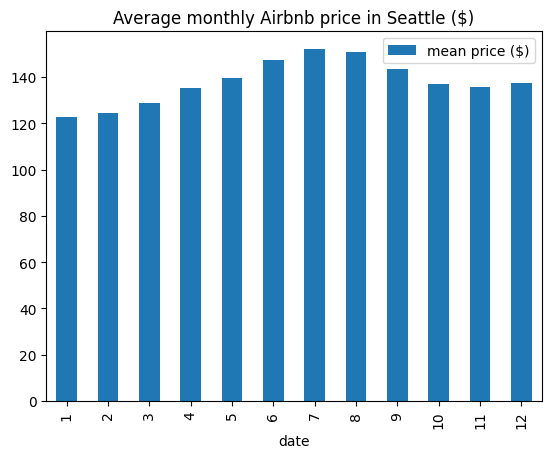

In [91]:
# Question 2: Average monthly Airbnb price in Seattle
# We represent the values obtained
avg_price_month_df.rename(columns={'date':'month', 'price':'avg. price ($)' },inplace=True)
avg_price_month_df.plot(kind='bar');
plt.title('Average monthly Airbnb price in Seattle ($)')

In [55]:
# Question 3: Mean price per Airbnb property type in Seattle
# We need to convert price to float
listing_df['price'] = listing_df['price'].replace('[\$,]', '', regex=True).astype(float)

In [75]:
# Question 3: Mean price per Airbnb property type in Seattle
# We calculate the mean price per property
avg_price_property_df = listing_df[['property_type', 'price']]
avg_price_property_df = avg_price_property_df.groupby(['property_type']).mean().sort_values(by='price', ascending=False)
avg_price_property_df



,price
property_type,
Boat,282.375000
Condominium,151.109890
Loft,135.700000
House,132.351414
Townhouse,129.457627
Apartment,122.932670
Camper/RV,120.461538
Bungalow,115.615385
Bed & Breakfast,112.054054


Text(0.5, 1.0, 'Average price per Airbnb property type in Seattle')

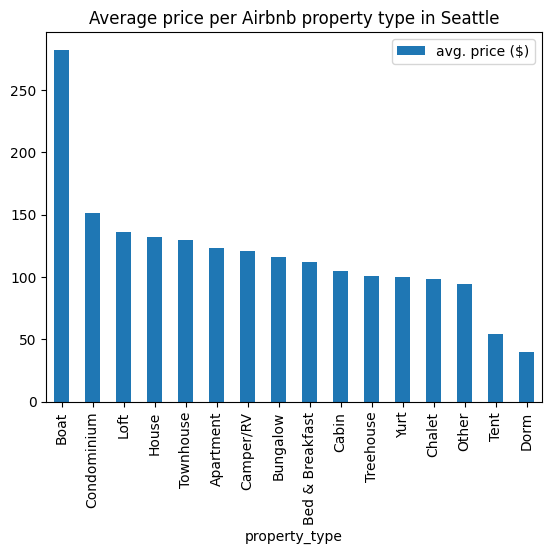

In [92]:
# Question 3: Mean price per Airbnb property type in Seattle
# We represent the values obtained
avg_price_property_df.rename(columns={'property_type':'property', 'price':'avg. price ($)' },inplace=True)
avg_price_property_df.plot(kind='bar');
plt.title('Average price per Airbnb property type in Seattle')